In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import KFold , train_test_split , cross_val_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/breast-cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
y = data[['diagnosis']]
x = data.drop(columns=['id','diagnosis'])
columns = x.columns

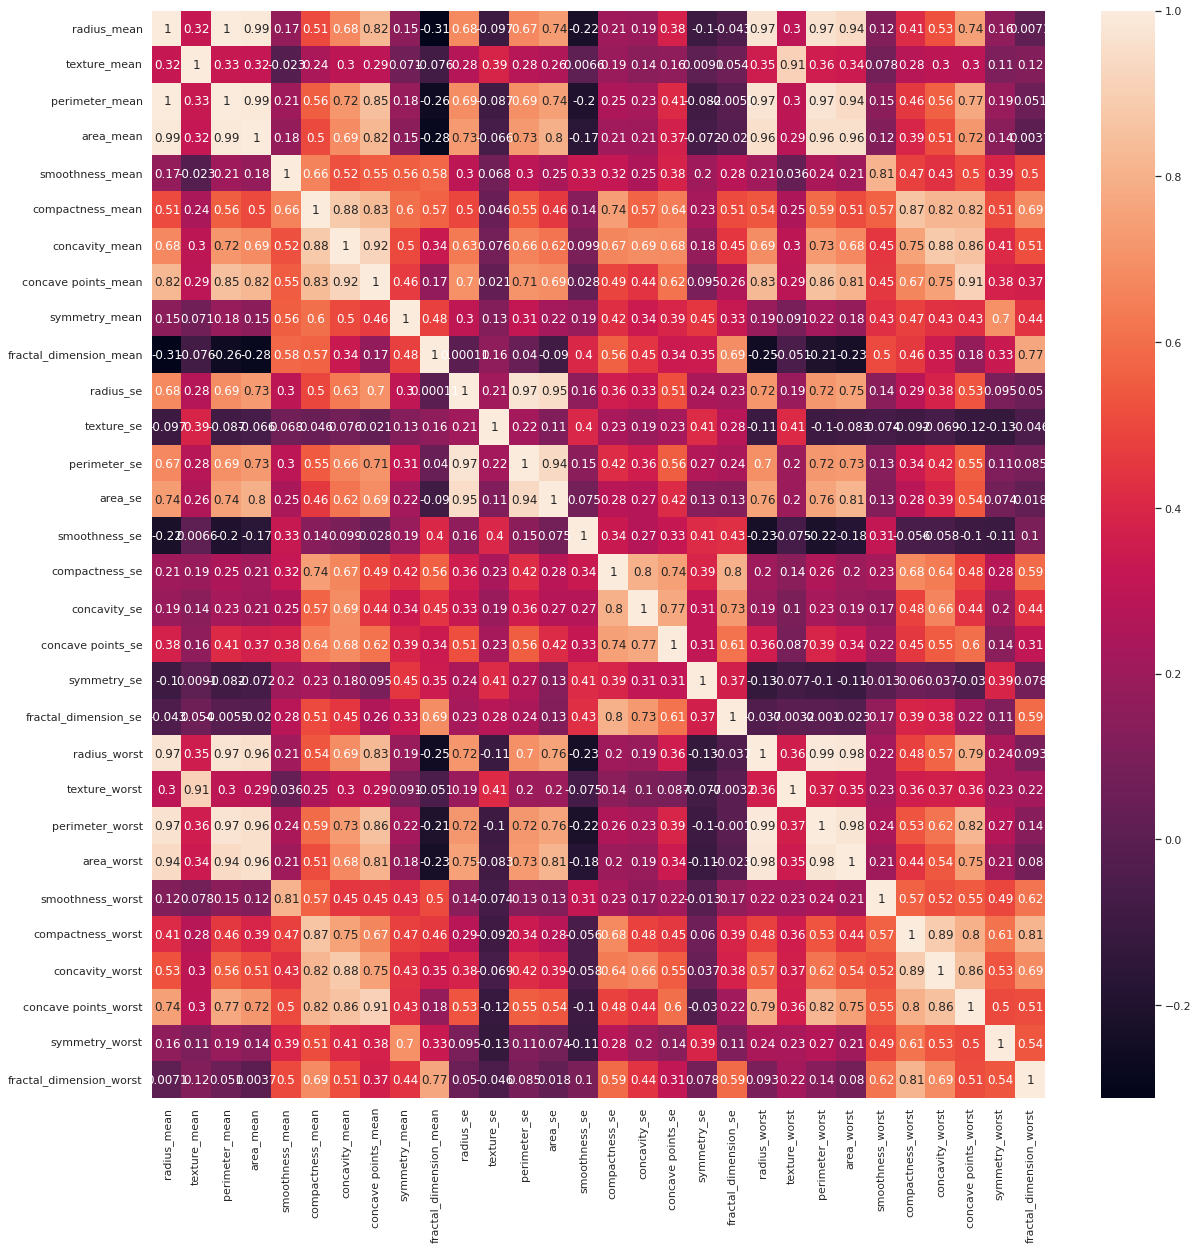

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))

cor_matrix = x.corr()
sns.heatmap(data= cor_matrix, annot= True)

plt.show()

In [ ]:
sc = StandardScaler()
x = sc.fit_transform(x)
x = pd.DataFrame(x, columns=columns)
data = pd.concat([y, x], axis= 1)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,M,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,M,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,M,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,M,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

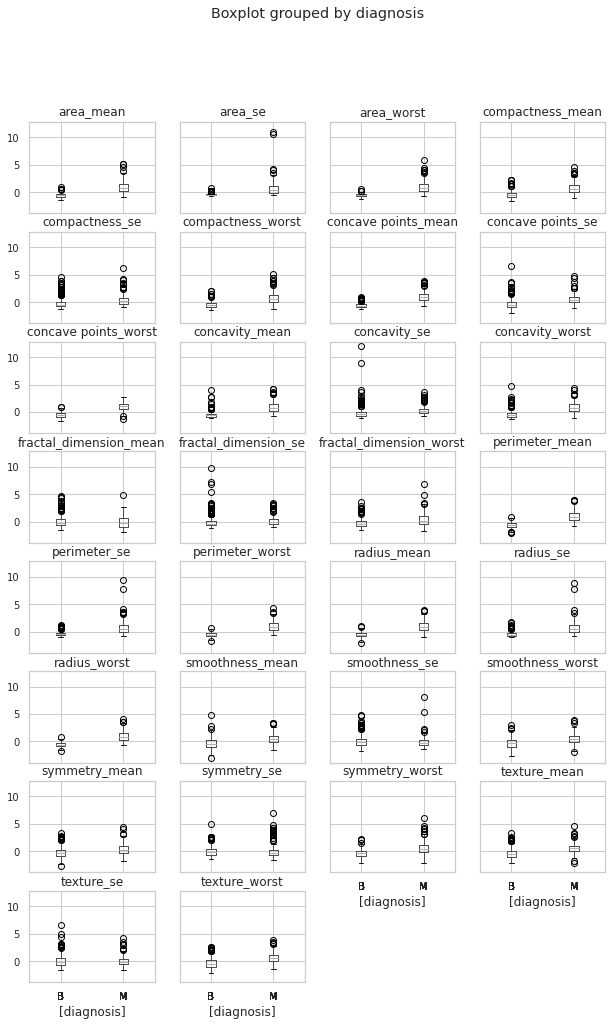

In [ ]:
boxplot = data.boxplot(by='diagnosis', figsize=(10, 20), layout=(10, 4), fontsize= 10)

In [ ]:
# should be dropped: fractal_mean,se - smoothness_mean,se - symmetry_mean,se - texture_se

In [ ]:
x = x.drop(columns=['fractal_dimension_mean', 'fractal_dimension_se','smoothness_mean', 'smoothness_se', 'symmetry_mean', 'symmetry_se', 'texture_se'])
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,3.283515,2.652874,2.532475,2.489734,2.833031,2.487578,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.487072,-0.023846,0.548144,0.499255,0.263327,0.742402,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,1.052926,1.363478,2.037231,1.228676,0.850928,1.181336,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.402909,1.915897,1.451707,0.326373,0.286593,-0.288378,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.539340,1.371011,1.428493,1.270543,1.273189,1.190357,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 53.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 52.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 53.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 56.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; y

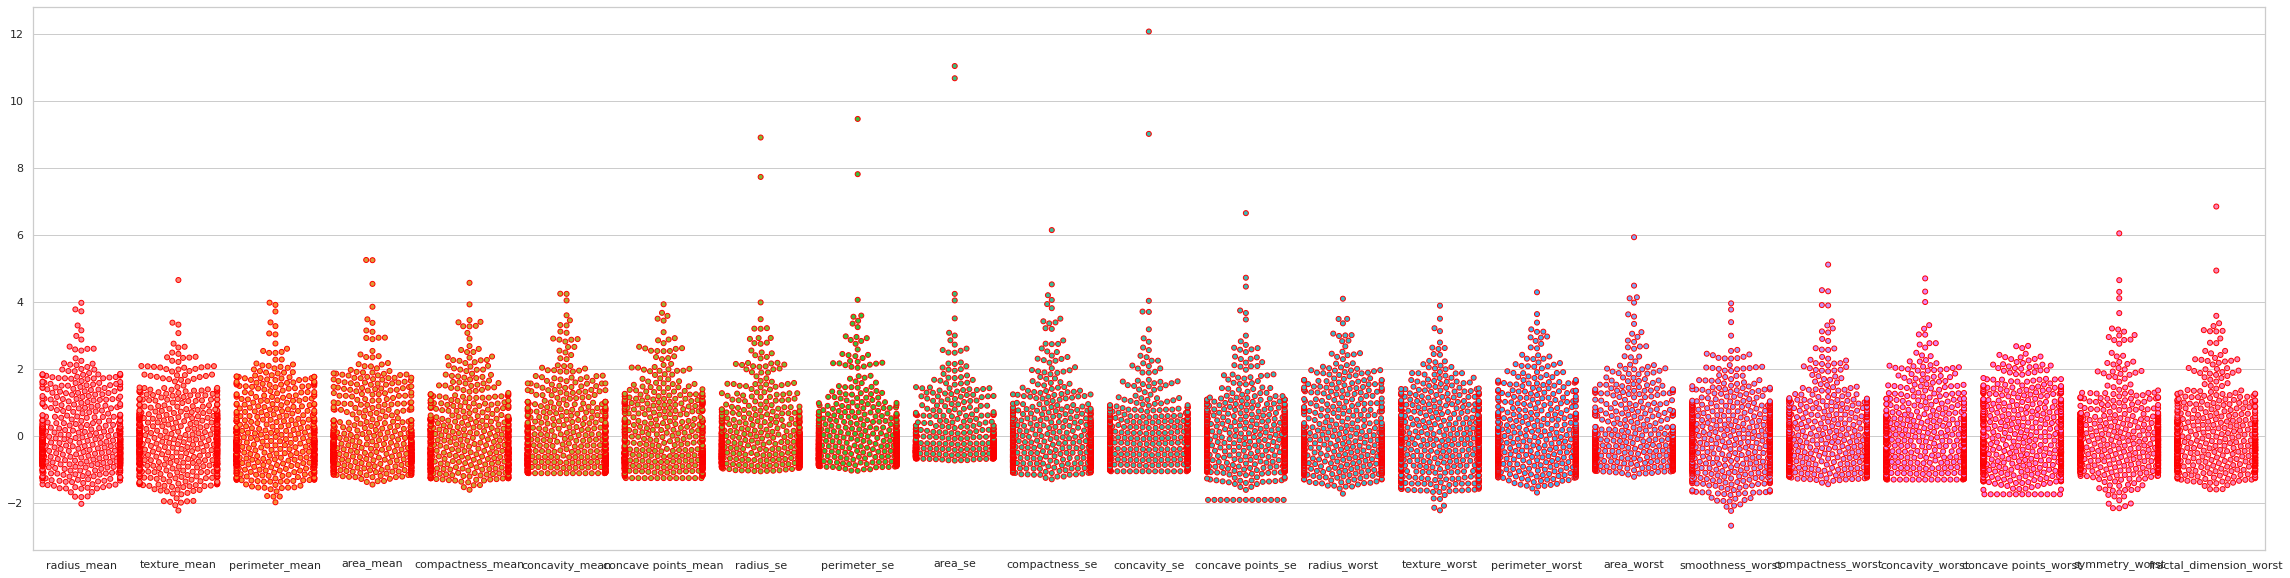

In [ ]:
fig, ax = plt.subplots(figsize=(40, 10))
sns.set(font_scale=10)
sns.set_theme(style='whitegrid')
sns.swarmplot(data=x, size=5, linewidth=1, edgecolor='red')
plt.show()

In [ ]:
cor_fea = x[['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']]
cor_fea.head()

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,area_se,radius_worst,perimeter_worst,area_worst,concave points_worst
0,1.097064,1.269934,0.984375,2.652874,2.532475,2.487578,1.886690,2.303601,2.001237,2.296076
1,1.829821,1.685955,1.908708,-0.023846,0.548144,0.742402,1.805927,1.535126,1.890489,1.087084
2,1.579888,1.566503,1.558884,1.363478,2.037231,1.181336,1.511870,1.347475,1.456285,1.955000
3,-0.768909,-0.592687,-0.764464,1.915897,1.451707,-0.288378,-0.281464,-0.249939,-0.550021,2.175786
4,1.750297,1.776573,1.826229,1.371011,1.428493,1.190357,1.298575,1.338539,1.220724,0.729259


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 17.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 18.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 25.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 24.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 21.1% of the points cannot be placed; y

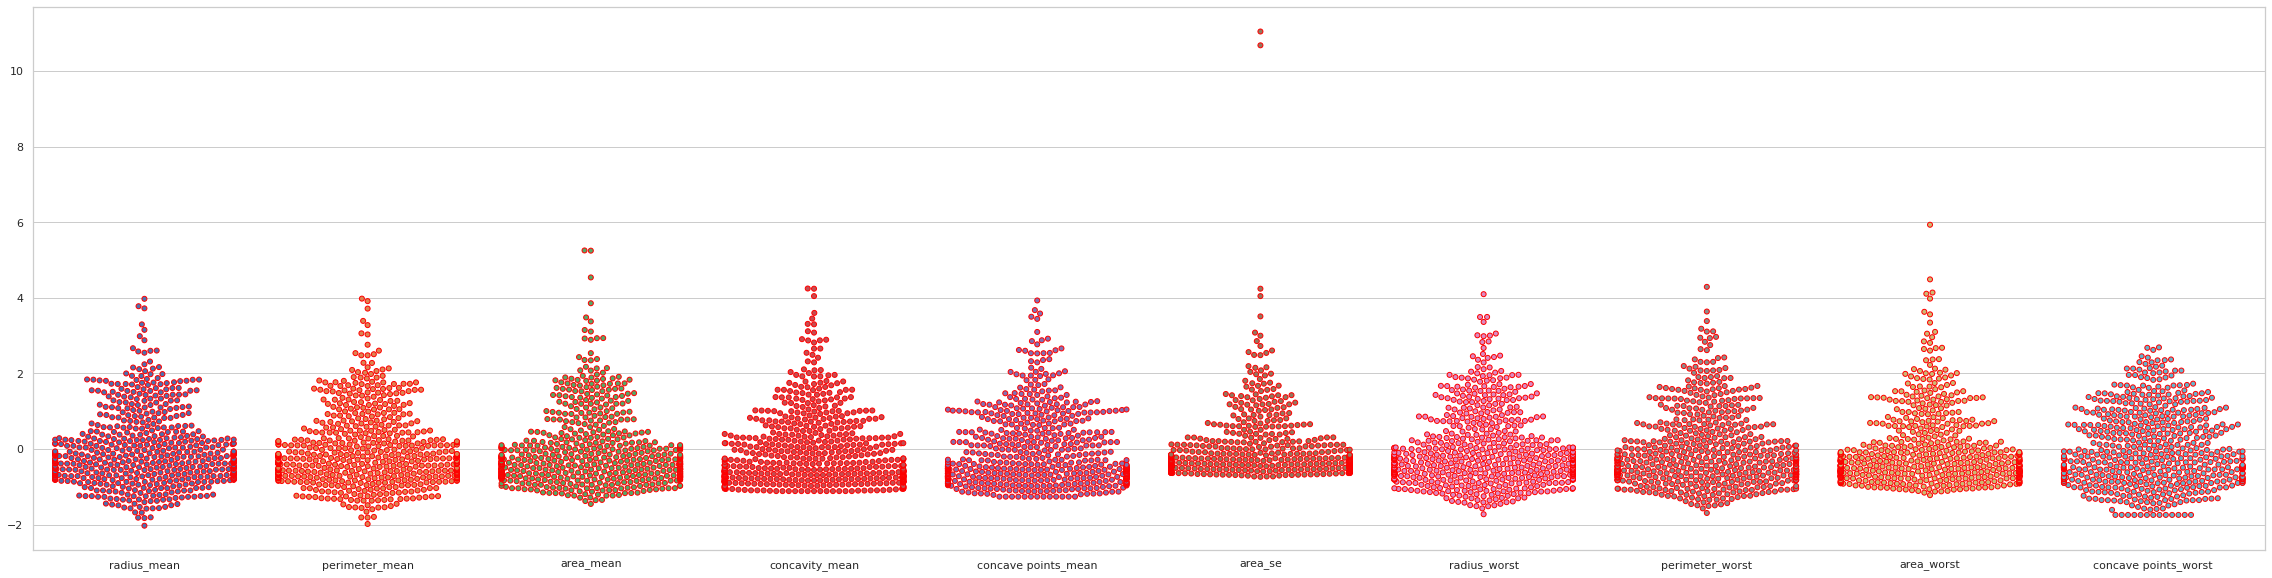

In [ ]:
fig, ax = plt.subplots(figsize=(40, 10))
sns.set(font_scale=10)
sns.set_theme(style='whitegrid')
sns.swarmplot(data=cor_fea, size=5, linewidth=1, edgecolor='red')
plt.show()

In [ ]:
uncor_fea = x.drop(columns=['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst', 'concave points_worst'])
uncor_fea.head()

,texture_mean,compactness_mean,radius_se,perimeter_se,compactness_se,concavity_se,concave points_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,-2.073335,3.283515,2.489734,2.833031,1.316862,0.724026,0.660820,-1.359293,1.307686,2.616665,2.109526,2.750622,1.937015
1,-0.353632,-0.487072,0.499255,0.263327,-0.692926,-0.440780,0.260162,-0.369203,-0.375612,-0.430444,-0.146749,-0.243890,0.281190
2,0.456187,1.052926,1.228676,0.850928,0.814974,0.213076,1.424827,-0.023974,0.527407,1.082932,0.854974,1.152255,0.201391
3,0.253732,3.402909,0.326373,0.286593,2.744280,0.819518,1.115007,0.133984,3.394275,3.893397,1.989588,6.046041,4.935010
4,-1.151816,0.539340,1.270543,1.273189,-0.048520,0.828471,1.144205,-1.466770,0.220556,-0.313395,0.613179,-0.868353,-0.397100


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 17.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 18.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 25.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 24.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 21.1% of the points cannot be placed; y

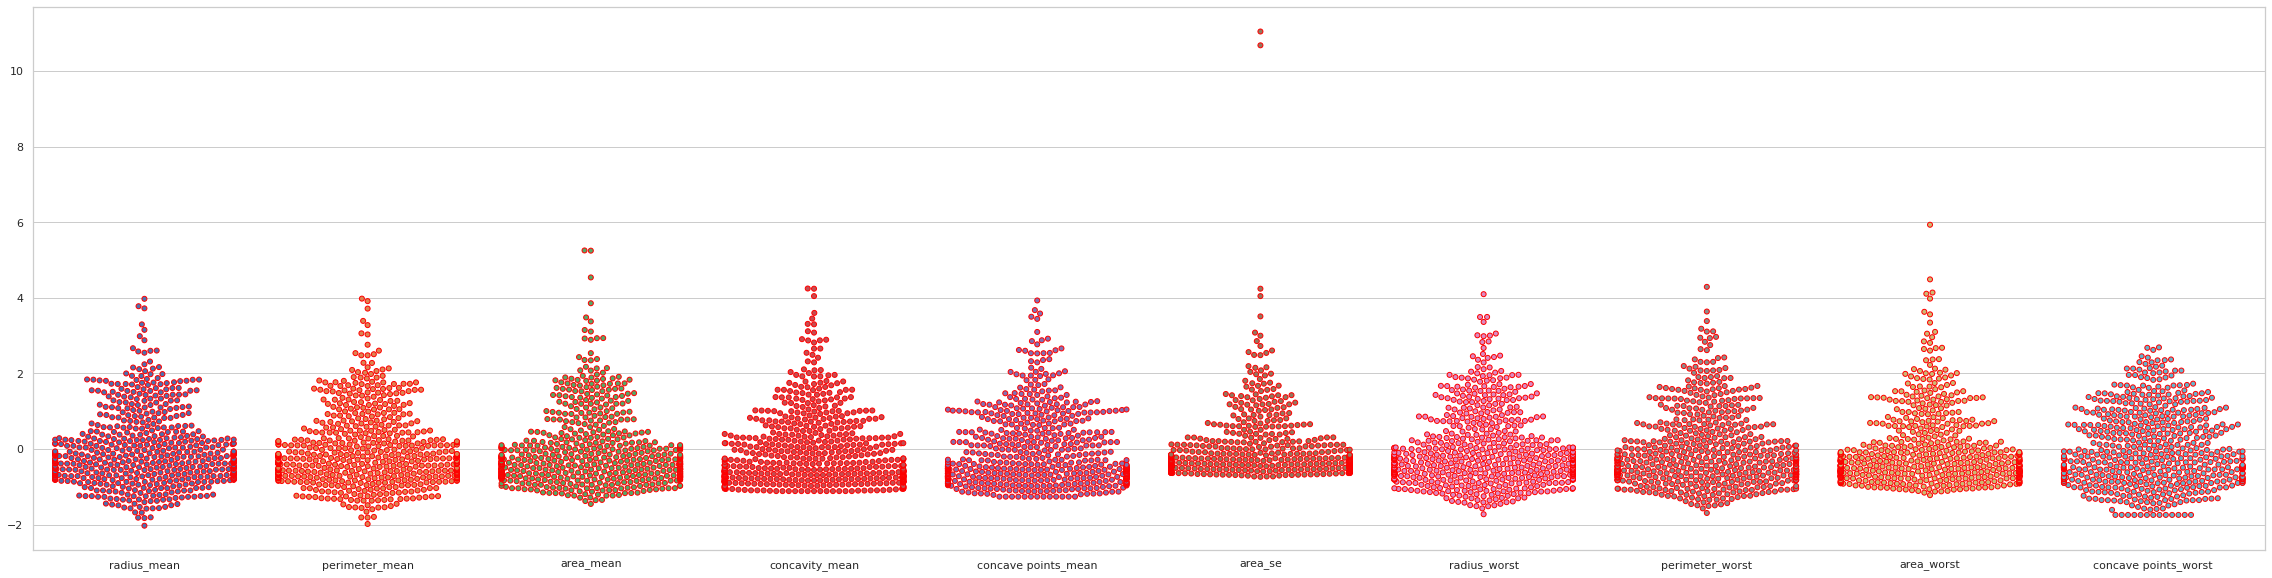

In [ ]:
fig, ax = plt.subplots(figsize=(40, 10))
sns.set(font_scale=10)
sns.set_theme(style='whitegrid')
sns.swarmplot(data=cor_fea, size=5, linewidth=1, edgecolor='red')
plt.show()

In [ ]:
pca = PCA(n_components= 0.95, svd_solver='full')
pca.fit(x)

print(pca.explained_variance_)
pca_feature = pd.DataFrame(pca.transform(x))

pca_feature.head()

[12.68940961  3.90561959  1.96584675  1.51555038  0.87088116  0.54100919
  0.44329036]


,0,1,2,3,4,5,6
0,8.526569,-1.575153,1.494956,-3.656348,2.002535,1.613011,-0.604901
1,2.877417,2.985587,-0.388092,-1.396670,-1.044887,-0.148383,-0.186789
2,5.661976,0.449203,0.060669,-0.772236,-0.258670,0.119266,0.709917
3,5.231704,-8.751283,-1.769340,-2.005993,2.491646,2.239224,0.607845
4,4.097361,2.147208,2.196249,-1.636364,-0.644618,-0.901173,0.143218


In [ ]:
lda = LinearDiscriminantAnalysis(n_components=1)

lda_feature = lda.fit(x, np.array(y).reshape(-1)).transform(x)
lda_feature.shape

(569, 1)

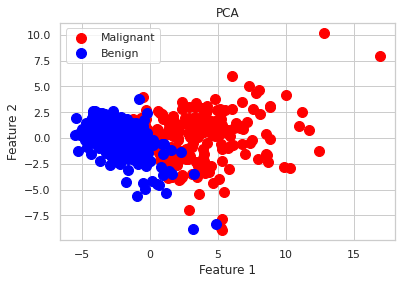

In [ ]:
plt.scatter(pca_feature[y['diagnosis'] == 'M'][0], pca_feature[y['diagnosis'] == 'M'][1], s=100, c='red', label='Malignant')
plt.scatter(pca_feature[y['diagnosis'] == 'B'][0], pca_feature[y['diagnosis'] == 'B'][1], s=100, c='blue', label='Benign')

plt.title('PCA')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [ ]:
train_X, test_X , train_y , test_y = train_test_split(x , y , test_size = 0.3, random_state = 32)
print(train_X.shape)
print(test_X.shape)

(398, 23)
(171, 23)


In [ ]:
train_cor, test_cor , train_ycor , test_ycor = train_test_split(cor_fea , y , test_size = 0.3, random_state = 32)
print(train_cor.shape)
print(test_cor.shape)

(398, 10)
(171, 10)


In [ ]:
train_uncor, test_uncor , train_yuncor , test_yuncor = train_test_split(uncor_fea , y , test_size = 0.3, random_state = 32)
print(train_uncor.shape)
print(test_uncor.shape)

(398, 13)
(171, 13)


# **MODEL**

## **Naive Bayes**

### **Split**

In [ ]:
nb = GaussianNB()
nb.fit(train_X,train_y)
y_pred = nb.predict(test_X)

lr_conf_matrix = confusion_matrix(test_y, y_pred)
lr_acc_score = accuracy_score(test_y, y_pred)
print("Accuracy : %.3f" %(lr_acc_score*100),'\n')
print("-------------------------------------------")
print(classification_report(test_y,y_pred))

Accuracy : 94.152 

-------------------------------------------
              precision    recall  f1-score   support

           B       0.94      0.96      0.95       105
           M       0.94      0.91      0.92        66

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


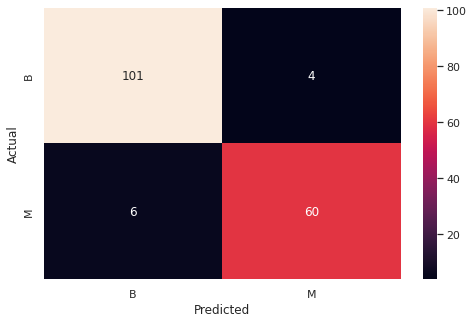

In [ ]:
y_true = ['B','M']
pred = ['B','M']
d = lr_conf_matrix
df_cm = pd.DataFrame(d, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8,5))
sns.heatmap(df_cm,fmt="d", annot=True)
plt.show()

In [ ]:
nb = GaussianNB()
nb.fit(train_cor,train_ycor)
y_pred = nb.predict(test_cor)

lr_conf_matrix = confusion_matrix(test_ycor, y_pred)
lr_acc_score = accuracy_score(test_ycor, y_pred)
print("Accuracy : %.3f" %(lr_acc_score*100),'\n')
print("-------------------------------------------")
print(classification_report(test_ycor,y_pred))

Accuracy : 91.228 

-------------------------------------------
              precision    recall  f1-score   support

           B       0.92      0.93      0.93       105
           M       0.89      0.88      0.89        66

    accuracy                           0.91       171
   macro avg       0.91      0.91      0.91       171
weighted avg       0.91      0.91      0.91       171



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


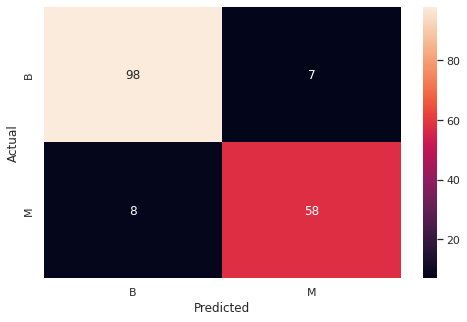

In [ ]:
y_true = ['B','M']
pred = ['B','M']
d = lr_conf_matrix
df_cm = pd.DataFrame(d, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8,5))
sns.heatmap(df_cm,fmt="d", annot=True)
plt.show()

In [ ]:
nb = GaussianNB()
nb.fit(train_uncor,train_yuncor)
y_pred = nb.predict(test_uncor)

lr_conf_matrix = confusion_matrix(test_yuncor, y_pred)
lr_acc_score = accuracy_score(test_yuncor, y_pred)
print("Accuracy : %.3f" %(lr_acc_score*100),'\n')
print("-------------------------------------------")
print(classification_report(test_yuncor,y_pred))

Accuracy : 85.965 

-------------------------------------------
              precision    recall  f1-score   support

           B       0.86      0.92      0.89       105
           M       0.86      0.76      0.81        66

    accuracy                           0.86       171
   macro avg       0.86      0.84      0.85       171
weighted avg       0.86      0.86      0.86       171



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


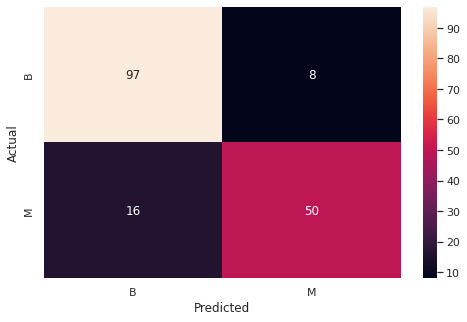

In [ ]:
y_true = ['B','M']
pred = ['B','M']
d = lr_conf_matrix
df_cm = pd.DataFrame(d, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8,5))
sns.heatmap(df_cm,fmt="d", annot=True)
plt.show()

### **CV**

In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
nb = GaussianNB()

scores = cross_val_score(nb, x , y, scoring='accuracy', cv=cv, n_jobs=-1)

print('Accuracy: %.4f ' % (np.mean(scores)))

Accuracy: 0.9367 


In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
nb = GaussianNB()

scores = cross_val_score(nb, cor_fea, y, scoring='accuracy', cv=cv, n_jobs=-1)

print('Accuracy: %.4f ' % (np.mean(scores)))

Accuracy: 0.9314 


In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
nb = GaussianNB()

scores = cross_val_score(nb, uncor_fea, y, scoring='accuracy', cv=cv, n_jobs=-1)

print('Accuracy: %.4f ' % (np.mean(scores)))

Accuracy: 0.8841 


### **PCA & LDA**

In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
nb = GaussianNB()

scores = cross_val_score(nb, pca_feature , y, scoring='accuracy', cv=cv, n_jobs=-1)

print('Accuracy: %.4f ' % (np.mean(scores)))

Accuracy: 0.9209 


In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
nb = GaussianNB()

scores = cross_val_score(nb, lda_feature , y, scoring='accuracy', cv=cv, n_jobs=-1)

print('Accuracy: %.4f ' % (np.mean(scores)))

Accuracy: 0.9719 


## **Logistic Regression**

### **Split**

In [ ]:
log = LogisticRegression(class_weight='balanced')
log.fit(train_X,train_y)
y_pred = log.predict(test_X)

lr_conf_matrix = confusion_matrix(test_y, y_pred)
lr_acc_score = accuracy_score(test_y, y_pred)
print("Accuracy :",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(test_y,y_pred))

Accuracy : 97.6608187134503 

-------------------------------------------
              precision    recall  f1-score   support

           B       0.99      0.97      0.98       105
           M       0.96      0.98      0.97        66

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


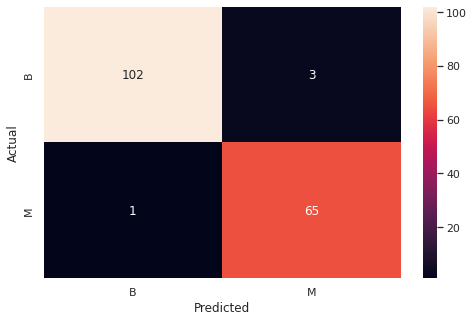

In [ ]:
y_true = ['B','M']
pred = ['B','M']
d = lr_conf_matrix
df_cm = pd.DataFrame(d, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8,5))
sns.heatmap(df_cm,fmt="d", annot=True)
plt.show()

In [ ]:
log = LogisticRegression(class_weight='balanced')
log.fit(train_cor,train_ycor)
y_pred = log.predict(test_cor)

lr_conf_matrix = confusion_matrix(test_ycor, y_pred)
lr_acc_score = accuracy_score(test_ycor, y_pred)
print("Accuracy :",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(test_ycor,y_pred))

Accuracy : 93.56725146198829 

-------------------------------------------
              precision    recall  f1-score   support

           B       0.97      0.92      0.95       105
           M       0.89      0.95      0.92        66

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


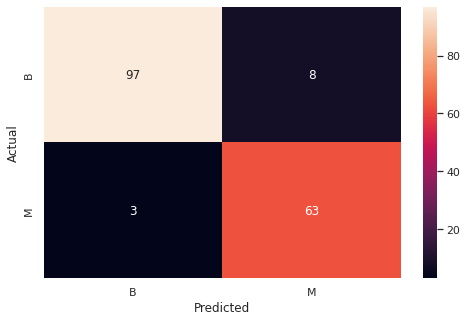

In [ ]:
y_true = ['B','M']
pred = ['B','M']
d = lr_conf_matrix
df_cm = pd.DataFrame(d, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8,5))
sns.heatmap(df_cm,fmt="d", annot=True)
plt.show()

In [ ]:
log = LogisticRegression(class_weight='balanced')
log.fit(train_uncor,train_yuncor)
y_pred = log.predict(test_uncor)

lr_conf_matrix = confusion_matrix(test_yuncor, y_pred)
lr_acc_score = accuracy_score(test_yuncor, y_pred)
print("Accuracy :",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(test_yuncor,y_pred))

Accuracy : 95.32163742690058 

-------------------------------------------
              precision    recall  f1-score   support

           B       0.96      0.96      0.96       105
           M       0.94      0.94      0.94        66

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


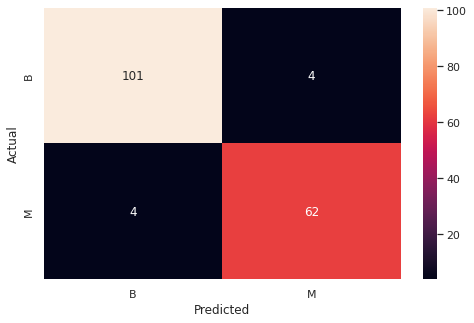

In [ ]:
y_true = ['B','M']
pred = ['B','M']
d = lr_conf_matrix
df_cm = pd.DataFrame(d, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8,5))
sns.heatmap(df_cm,fmt="d", annot=True)
plt.show()

### **CV**

In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
log = LogisticRegression( penalty='l2', solver='liblinear', C=1)
scores = cross_val_score(log, x , y, scoring='accuracy', cv=cv, n_jobs=-1)

print('Accuracy: %.4f ' % (np.mean(scores)))

Accuracy: 0.9824 


In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
log = LogisticRegression(penalty='l2', solver='liblinear')
scores = cross_val_score(log, cor_fea, y, scoring='accuracy', cv=cv, n_jobs=-1)

print('Accuracy: %.4f ' % (np.mean(scores)))

Accuracy: 0.9508 


In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
log = LogisticRegression(class_weight='balanced', penalty='l2', solver='liblinear')
scores = cross_val_score(log, uncor_fea, y, scoring='accuracy', cv=cv, n_jobs=-1)

print('Accuracy: %.4f ' % (np.mean(scores)))

Accuracy: 0.9508 


### **PCA & LDA**

In [ ]:
cv = KFold(n_splits=10, random_state=42, shuffle=True)
log = LogisticRegression( penalty='l2', solver='liblinear')
scores = cross_val_score(log, pca_feature, y, scoring='accuracy', cv=cv, n_jobs=-1)

print('Accuracy: %.4f ' % (np.mean(scores)))

Accuracy: 0.9825 


In [ ]:
cv = KFold(n_splits=10, random_state=42, shuffle=True)
log = LogisticRegression(penalty='l2', solver='liblinear')
scores = cross_val_score(log, lda_feature, y, scoring='accuracy', cv=cv, n_jobs=-1)

print('Accuracy: %.4f ' % (np.mean(scores)))

Accuracy: 0.9825 


## **Decision Tree**

### **Split**

In [ ]:
dt = DecisionTreeClassifier(random_state=32, class_weight='balanced')
dt.fit(train_X, train_y)
y_pred = dt.predict(test_X)

lr_conf_matrix = confusion_matrix(test_y, y_pred)
lr_acc_score = accuracy_score(test_y, y_pred)
print("Accuracy :",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(test_y,y_pred))

Accuracy : 92.98245614035088 

-------------------------------------------
              precision    recall  f1-score   support

           B       0.93      0.96      0.94       105
           M       0.94      0.88      0.91        66

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.93       171
weighted avg       0.93      0.93      0.93       171



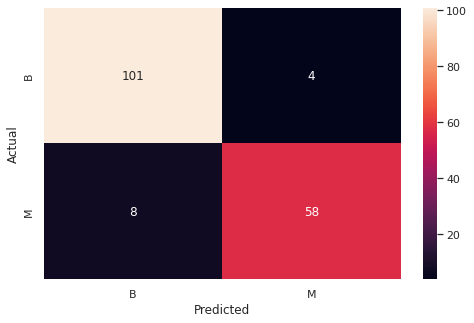

In [ ]:
y_true = ['B','M']
pred = ['B','M']
d = lr_conf_matrix
df_cm = pd.DataFrame(d, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8,5))
sns.heatmap(df_cm,fmt="d", annot=True)
plt.show()

In [ ]:
dt = DecisionTreeClassifier(random_state=32, class_weight='balanced')
dt.fit(train_cor, train_ycor)
y_pred = dt.predict(test_cor)

lr_conf_matrix = confusion_matrix(test_ycor, y_pred)
lr_acc_score = accuracy_score(test_ycor, y_pred)
print("Accuracy :",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(test_ycor,y_pred))

Accuracy : 90.64327485380117 

-------------------------------------------
              precision    recall  f1-score   support

           B       0.91      0.94      0.93       105
           M       0.90      0.85      0.88        66

    accuracy                           0.91       171
   macro avg       0.91      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171



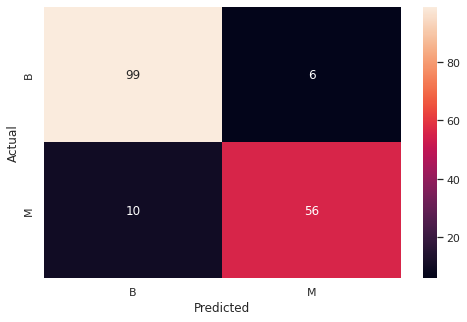

In [ ]:
y_true = ['B','M']
pred = ['B','M']
d = lr_conf_matrix
df_cm = pd.DataFrame(d, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8,5))
sns.heatmap(df_cm,fmt="d", annot=True)
plt.show()

In [ ]:
dt = DecisionTreeClassifier(random_state=32, class_weight='balanced')
dt.fit(train_uncor, train_yuncor)
y_pred = dt.predict(test_uncor)

lr_conf_matrix = confusion_matrix(test_yuncor, y_pred)
lr_acc_score = accuracy_score(test_yuncor, y_pred)
print("Accuracy :",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(test_yuncor,y_pred))

Accuracy : 90.05847953216374 

-------------------------------------------
              precision    recall  f1-score   support

           B       0.93      0.90      0.92       105
           M       0.86      0.89      0.87        66

    accuracy                           0.90       171
   macro avg       0.89      0.90      0.90       171
weighted avg       0.90      0.90      0.90       171



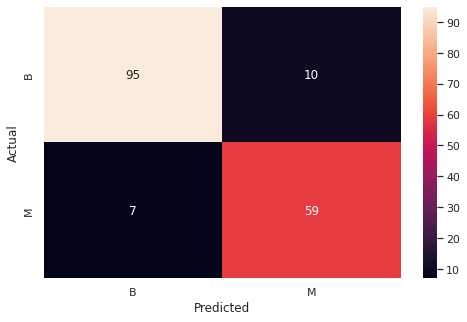

In [ ]:
y_true = ['B','M']
pred = ['B','M']
d = lr_conf_matrix
df_cm = pd.DataFrame(d, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8,5))
sns.heatmap(df_cm,fmt="d", annot=True)
plt.show()

### **CV**

In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
dt = DecisionTreeClassifier(random_state=2, criterion='gini', max_depth=6)
scores = cross_val_score(dt, x , y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.4f ' % (np.mean(scores)))

Accuracy: 0.9437 


In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
dt = DecisionTreeClassifier(random_state=2, criterion='gini', max_depth=6)
scores = cross_val_score(dt, cor_fea, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.4f ' % (np.mean(scores)))

Accuracy: 0.9262 


In [ ]:
cv = KFold(n_splits=10, random_state=32, shuffle=True)
dt = DecisionTreeClassifier(random_state=32, criterion='gini', max_depth=6)
scores = cross_val_score(dt, uncor_fea, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.4f ' % (np.mean(scores)))

Accuracy: 0.8876 


### **PCA & LDA**

In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
dt = DecisionTreeClassifier(random_state=2, criterion='gini', max_depth=6)
scores = cross_val_score(dt, pca_feature, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.4f ' % (np.mean(scores)))

Accuracy: 0.9403 


In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
dt = DecisionTreeClassifier(random_state=2, criterion='gini', max_depth=6)
scores = cross_val_score(dt, lda_feature, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.4f ' % (np.mean(scores)))

Accuracy: 0.9649 


## **Random Forest**

### **Split**

In [ ]:
rf = RandomForestClassifier(random_state=32)
rf.fit(train_X,train_y)
y_pred = rf.predict(test_X)

lr_conf_matrix = confusion_matrix(test_y, y_pred)
lr_acc_score = accuracy_score(test_y, y_pred)
print("Accuracy :",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(test_y,y_pred))

<ipython-input-60-16ddc431fa54>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train_X,train_y)


Accuracy : 95.32163742690058 

-------------------------------------------
              precision    recall  f1-score   support

           B       0.95      0.97      0.96       105
           M       0.95      0.92      0.94        66

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



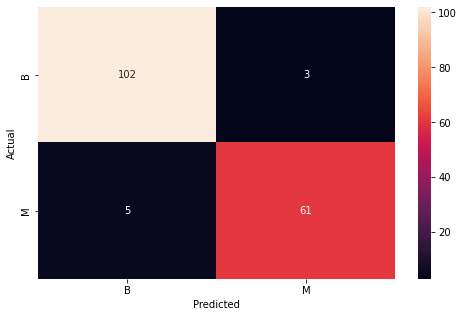

In [ ]:
y_true = ['B','M']
pred = ['B','M']
d = lr_conf_matrix
df_cm = pd.DataFrame(d, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8,5))
sns.heatmap(df_cm,fmt="d", annot=True)
plt.show()

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(train_cor,train_ycor)
y_pred = rf.predict(test_cor)

lr_conf_matrix = confusion_matrix(test_ycor, y_pred)
lr_acc_score = accuracy_score(test_ycor, y_pred)
print("Accuracy :",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(test_ycor,y_pred))

<ipython-input-65-3da3e8d61511>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train_cor,train_ycor)


Accuracy : 93.56725146198829 

-------------------------------------------
              precision    recall  f1-score   support

           B       0.95      0.94      0.95       105
           M       0.91      0.92      0.92        66

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



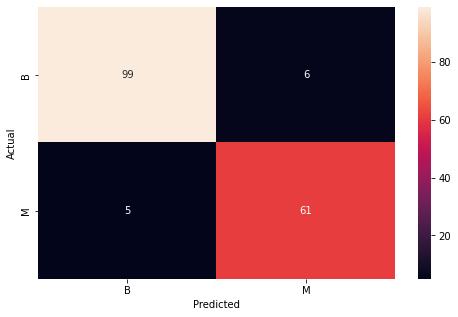

In [ ]:
y_true = ['B','M']
pred = ['B','M']
d = lr_conf_matrix
df_cm = pd.DataFrame(d, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8,5))
sns.heatmap(df_cm,fmt="d", annot=True)
plt.show()

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(train_uncor,train_yuncor)
y_pred = rf.predict(test_uncor)

lr_conf_matrix = confusion_matrix(test_yuncor, y_pred)
lr_acc_score = accuracy_score(test_yuncor, y_pred)
print("Accuracy :",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(test_yuncor,y_pred))

<ipython-input-69-b9da5c8f701c>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train_uncor,train_yuncor)


Accuracy : 92.39766081871345 

-------------------------------------------
              precision    recall  f1-score   support

           B       0.92      0.96      0.94       105
           M       0.93      0.86      0.90        66

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171



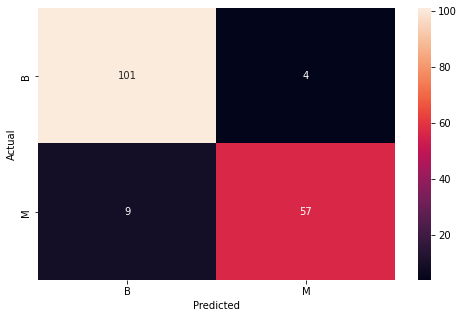

In [ ]:
y_true = ['B','M']
pred = ['B','M']
d = lr_conf_matrix
df_cm = pd.DataFrame(d, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8,5))
sns.heatmap(df_cm,fmt="d", annot=True)
plt.show()

### **CV**

In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
rf = RandomForestClassifier(random_state=3, n_estimators=100, max_depth=7)
scores = cross_val_score(rf, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.4f ' % (np.mean(scores)))

Accuracy: 0.9648 


In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
rf = RandomForestClassifier(random_state=3, n_estimators=100, max_depth=7)
scores = cross_val_score(rf, cor_fea, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.4f ' % (np.mean(scores)))

Accuracy: 0.9490 


In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
rf = RandomForestClassifier(random_state=3, n_estimators=100, max_depth=8)
scores = cross_val_score(rf, uncor_fea, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.4f ' % (np.mean(scores)))

Accuracy: 0.9298 


### **PCA & LDA**

In [ ]:
cv = KFold(n_splits=10, random_state=32, shuffle=True)
rf = RandomForestClassifier(random_state=3, n_estimators=100, max_depth=7)
scores = cross_val_score(rf, pca_feature, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.4f ' % (np.mean(scores)))

Accuracy: 0.9614 


In [ ]:
cv = KFold(n_splits=10, random_state=32, shuffle=True)
rf = RandomForestClassifier(random_state=3, n_estimators=100, max_depth=8)
scores = cross_val_score(rf, lda_feature, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.4f ' % (np.mean(scores)))

Accuracy: 0.9737 


## **SVM**

### **Split**

In [ ]:
SVM = SVC(class_weight='balanced')
SVM.fit(train_X , train_y)
y_pred = SVM.predict(test_X)

lr_conf_matrix = confusion_matrix(test_y, y_pred)
lr_acc_score = accuracy_score(test_y, y_pred)
print("Accuracy :",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(test_y,y_pred))

Accuracy : 99.41520467836257 

-------------------------------------------
              precision    recall  f1-score   support

           B       0.99      1.00      1.00       105
           M       1.00      0.98      0.99        66

    accuracy                           0.99       171
   macro avg       1.00      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


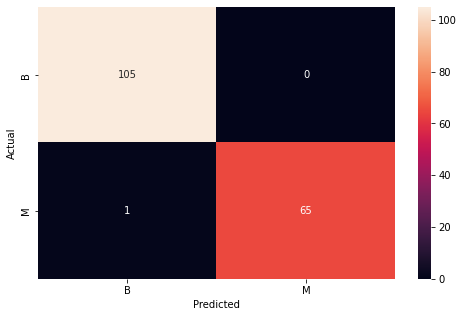

In [ ]:
y_true = ['B','M']
pred = ['B','M']
d = lr_conf_matrix
df_cm = pd.DataFrame(d, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8,5))
sns.heatmap(df_cm,fmt="d", annot=True)
plt.show()

In [ ]:
SVM = SVC(class_weight='balanced')
SVM.fit(train_cor , train_ycor)
y_pred = SVM.predict(test_cor)

lr_conf_matrix = confusion_matrix(test_ycor, y_pred)
lr_acc_score = accuracy_score(test_ycor, y_pred)
print("Accuracy :",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(test_ycor,y_pred))

Accuracy : 95.32163742690058 

-------------------------------------------
              precision    recall  f1-score   support

           B       0.97      0.95      0.96       105
           M       0.93      0.95      0.94        66

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


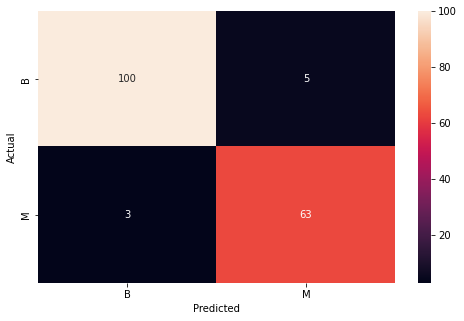

In [ ]:
y_true = ['B','M']
pred = ['B','M']
d = lr_conf_matrix
df_cm = pd.DataFrame(d, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8,5))
sns.heatmap(df_cm,fmt="d", annot=True)
plt.show()

In [ ]:
SVM = SVC(class_weight='balanced')
SVM.fit(train_uncor , train_yuncor)
y_pred = SVM.predict(test_uncor)

lr_conf_matrix = confusion_matrix(test_yuncor, y_pred)
lr_acc_score = accuracy_score(test_yuncor, y_pred)
print("Accuracy :",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(test_yuncor,y_pred))

Accuracy : 95.90643274853801 

-------------------------------------------
              precision    recall  f1-score   support

           B       0.95      0.98      0.97       105
           M       0.97      0.92      0.95        66

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


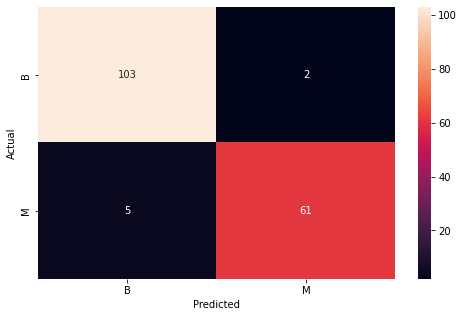

In [ ]:
y_true = ['B','M']
pred = ['B','M']
d = lr_conf_matrix
df_cm = pd.DataFrame(d, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8,5))
sns.heatmap(df_cm,fmt="d", annot=True)
plt.show()

### **CV**

In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
SVM = SVC(kernel='rbf', C=2)
scores = cross_val_score(SVM, x , y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.4f ' % (np.mean(scores)))

Accuracy: 0.9754 


In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
SVM = SVC(kernel='rbf', C=4)
scores = cross_val_score(SVM, cor_fea, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.4f ' % (np.mean(scores)))

Accuracy: 0.9490 


In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
SVM = SVC(kernel='rbf', C=3)
scores = cross_val_score(SVM, uncor_fea, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.4f ' % (np.mean(scores)))

Accuracy: 0.9508 


### **LDA & PCA**

In [ ]:
cv = KFold(n_splits=10, random_state=32, shuffle=True)
SVM = SVC(kernel='rbf', C=3)

scores = cross_val_score(SVM, pca_feature, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.4f ' % (np.mean(scores)))

Accuracy: 0.9772 


In [ ]:
cv = KFold(n_splits=10, random_state=30, shuffle=True)
SVM = SVC(kernel='rbf', C=7)

scores = cross_val_score(SVM, lda_feature, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.4f ' % (np.mean(scores)))

Accuracy: 0.9807 


## **KNN**

### **Split**

In [ ]:
knn = KNeighborsClassifier()
knn.fit(train_X, train_y)
y_pred = knn.predict(test_X)

lr_conf_matrix = confusion_matrix(test_y, y_pred)
lr_acc_score = accuracy_score(test_y, y_pred)
print("Accuracy :",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(test_y,y_pred))

Accuracy : 98.24561403508771 

-------------------------------------------
              precision    recall  f1-score   support

           B       0.97      1.00      0.99       105
           M       1.00      0.95      0.98        66

    accuracy                           0.98       171
   macro avg       0.99      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


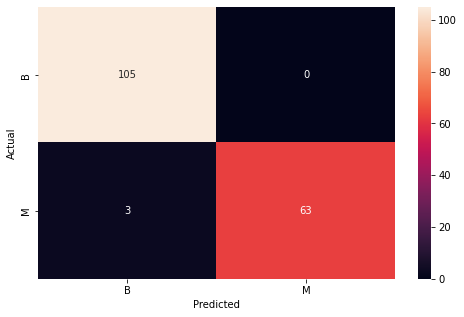

In [ ]:
y_true = ['B','M']
pred = ['B','M']
d = lr_conf_matrix
df_cm = pd.DataFrame(d, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8,5))
sns.heatmap(df_cm,fmt="d", annot=True)
plt.show()

In [ ]:
knn = KNeighborsClassifier()
knn.fit(train_cor , train_ycor)
y_pred = knn.predict(test_cor)

lr_conf_matrix = confusion_matrix(test_ycor, y_pred)
lr_acc_score = accuracy_score(test_ycor, y_pred)
print("Accuracy :",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(test_ycor,y_pred))

Accuracy : 92.98245614035088 

-------------------------------------------
              precision    recall  f1-score   support

           B       0.93      0.95      0.94       105
           M       0.92      0.89      0.91        66

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.93       171
weighted avg       0.93      0.93      0.93       171



/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


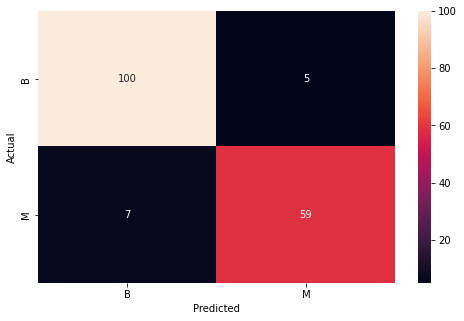

In [ ]:
y_true = ['B','M']
pred = ['B','M']
d = lr_conf_matrix
df_cm = pd.DataFrame(d, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8,5))
sns.heatmap(df_cm,fmt="d", annot=True)
plt.show()

In [ ]:
knn = KNeighborsClassifier()
knn.fit(train_uncor , train_yuncor)
y_pred = knn.predict(test_uncor)

lr_conf_matrix = confusion_matrix(test_yuncor, y_pred)
lr_acc_score = accuracy_score(test_yuncor, y_pred)
print("Accuracy :",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(test_yuncor,y_pred))

Accuracy : 91.22807017543859 

-------------------------------------------
              precision    recall  f1-score   support

           B       0.90      0.96      0.93       105
           M       0.93      0.83      0.88        66

    accuracy                           0.91       171
   macro avg       0.92      0.90      0.91       171
weighted avg       0.91      0.91      0.91       171



/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


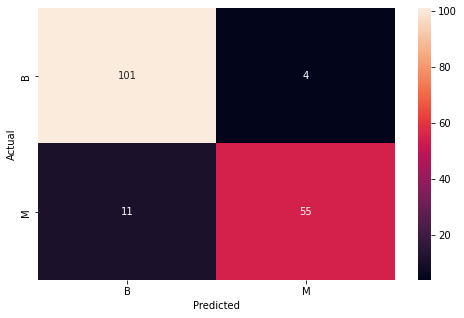

In [ ]:
y_true = ['B','M']
pred = ['B','M']
d = lr_conf_matrix
df_cm = pd.DataFrame(d, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8,5))
sns.heatmap(df_cm,fmt="d", annot=True)
plt.show()

### **CV**

In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
knn = KNeighborsClassifier(n_neighbors=9, weights='distance')
scores = cross_val_score(knn, x , y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.4f ' % (np.mean(scores)))

Accuracy: 0.9719 


In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
knn = KNeighborsClassifier(n_neighbors=7, weights='distance', metric='cosine')
scores = cross_val_score(knn, cor_fea, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.4f ' % (np.mean(scores)))

Accuracy: 0.9560 


In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
knn = KNeighborsClassifier(n_neighbors=8, weights='distance', metric='cosine')
scores = cross_val_score(knn, uncor_fea, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.4f ' % (np.mean(scores)))

Accuracy: 0.9332 


### **PCA & LDA**

In [ ]:
cv = KFold(n_splits=10, random_state=42, shuffle=True)
knn = KNeighborsClassifier(n_neighbors=9, weights='distance', metric='cosine')
scores = cross_val_score(knn, pca_feature, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.4f ' % (np.mean(scores)))

Accuracy: 0.9701 


In [ ]:
cv = KFold(n_splits=10, random_state=42, shuffle=True)
knn = KNeighborsClassifier(n_neighbors=7, weights='distance', metric='cosine')
scores = cross_val_score(knn, lda_feature, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.4f ' % (np.mean(scores)))

Accuracy: 0.9772 
